In [1]:
pip install timm

     ---------------------------------------- 0.0/47.5 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.5 kB ? eta -:--:--
     -------------------------------------- 47.5/47.5 kB 477.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
    --------------------------------------- 0.0/2.3 MB 1.9 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.3 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.3 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.3 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.3 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.3 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.3 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.3 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.3 MB 1.1 MB/s eta 0:00:02
   ------- -----------


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", model_type)

# Auf GPU verlagern
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [00:06<00:00, 210MB/s]


DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [ ]:

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


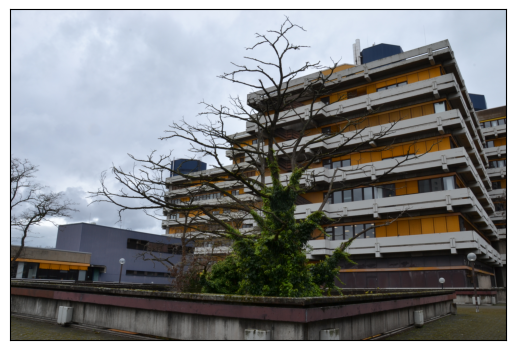

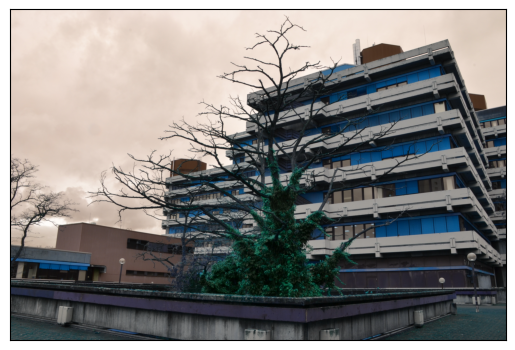

In [ ]:
IMG1 = cv2.imread('/content/drive/My Drive/Baum_R.JPG')
plt.imshow(IMG1[:,:,::-1])  # OpenCV reads images in BGR format, so we need to convert it to RGB for matplotlib
plt.xticks([])  # Entfernt die x-Achsenbeschriftungen
plt.yticks([])  # Entfernt die y-Achsenbeschriftungen
plt.show()
img = cv2.cvtColor(IMG1, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])  # OpenCV reads images in BGR format, so we need to convert it to RGB for matplotlib
plt.xticks([])  # Entfernt die x-Achsenbeschriftungen
plt.yticks([])  # Entfernt die y-Achsenbeschriftungen
plt.show()
input_batch = transform(img).to(device)

In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

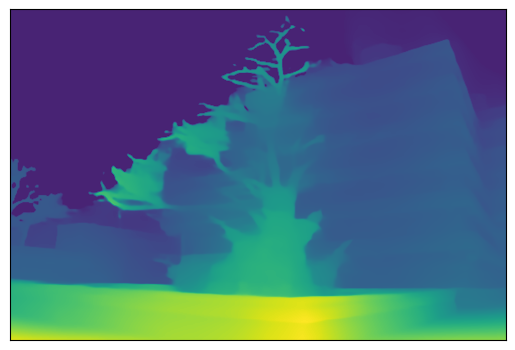

In [ ]:
plt.imshow(output)
plt.xticks([])  # Entfernt die x-Achsenbeschriftungen
plt.yticks([])  # Entfernt die y-Achsenbeschriftungen
plt.show()